In [41]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import torch
import math
from google.colab import drive, files
import io
import json

In [ ]:
# read impression.json data:




impression_df = None
USEDRIVE = False
if(USEDRIVE):
  drive.mount('/content/drive')
  f = open('/content/drive/My Drive/finance3/impression.json')
  impression_json = json.load(f)
  f.close()
  pd.DataFrame(impression_json)
else:
  uploaded = files.upload()
  impression_df = pd.read_json((io.BytesIO(uploaded["impression.json"])))




In [4]:
impression_df['impression_time'] = pd.to_datetime(impression_df['impression_time'], unit='ms') # , format='%Y-%m-%d %H:%M'
impression_df.head(40)

,token,impression_time,news_index_encode,target_news_onehot,all_click_seq,click_seq_10,click_seq_10_onehot,y
0,11,2022-08-01 11:00:00,643,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",[],[],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
1,11,2022-08-01 14:00:00,732,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,11,2022-08-01 19:00:00,1015,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
3,11,2022-08-01 20:00:00,1042,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
4,11,2022-08-01 20:00:00,1068,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",[],[],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
5,11,2022-08-01 21:00:00,1090,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
6,11,2022-08-01 22:00:00,1124,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
7,11,2022-08-01 22:00:00,1156,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
8,11,2022-08-01 23:00:00,1163,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
9,11,2022-08-02 08:00:00,1178,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",[],[],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


In [5]:
# splitting data into train, validation and test data:

print("df len: ",len(impression_df),"\n--------------------------")
# 2022/08/01-2022/08/07 as the training part
df_train = impression_df[(impression_df["impression_time"] < "2022-08-08 00:00:00")]
print("df train length: ", len(df_train))
# 2022/08/08-2022/08/09 as the validation part
df_val = impression_df[(impression_df["impression_time"] >= "2022-08-08 00:00:00") & (impression_df["impression_time"] < "2022-08-10 00:00:00")]
print("df validation length: ", len(df_val))

# 2022/08/10 as the test part
df_test = impression_df[(impression_df["impression_time"] >= "2022-08-10 00:00:00")]
print("df test length: ", len(df_test))

df len:  150023 
--------------------------
df train length:  105320
df validation length:  34362
df test length:  10341


In [6]:

def determine_device():
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    return DEVICE


class ImpressionDataSet(Dataset):
    
    def __init__(self, df, last_n_days=10):
        """df should have columns target_news_onehot[float; 27] and click_seq_10_onehot [[float;27], 10]"""
       
        history = df["click_seq_10_onehot"].apply(lambda x: np.array(x)).to_numpy()  # .iloc[0]
        actual = df["target_news_onehot"].apply(lambda x: np.array(x)).to_numpy()
        inputs = np.zeros((len(df), last_n_days+1,27), dtype=np.float32)
        for i, (h,a) in enumerate(zip(history, actual)):
            inputs[i,:-1,:] = h[10-last_n_days:]
            inputs[i,-1,:] = a
        self.inputs = torch.from_numpy(inputs).float().to(determine_device())
        self.labels = torch.from_numpy(df["y"].to_numpy()).float().to(determine_device())
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        example = self.inputs[idx,:,:]
        label = self.labels[idx]
        return example, label

In [7]:

from torch.utils.data import DataLoader

BATCH_SIZE = 128

# datasets using current day and last 10 days
test_set = ImpressionDataSet(df_test, last_n_days=10)
train_set = ImpressionDataSet(df_train, last_n_days=10)
val_set = ImpressionDataSet(df_val, last_n_days=10)

test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=True)

# datasets using only current day and last 3 days
test_set_3 = ImpressionDataSet(df_test, last_n_days=3)
train_set_3 = ImpressionDataSet(df_train, last_n_days=3)
val_set_3 = ImpressionDataSet(df_val, last_n_days=3)

test_loader_3 = DataLoader(test_set_3, batch_size=BATCH_SIZE, shuffle=True)
train_loader_3 = DataLoader(train_set_3, batch_size=BATCH_SIZE, shuffle=True)
val_loader_3 = DataLoader(val_set_3, batch_size=BATCH_SIZE, shuffle=True)

# datasets using only current day and last 5 days
test_set_5 = ImpressionDataSet(df_test, last_n_days=5)
train_set_5 = ImpressionDataSet(df_train, last_n_days=5)
val_set_5 = ImpressionDataSet(df_val, last_n_days=5)

test_loader_5 = DataLoader(test_set_5, batch_size=BATCH_SIZE, shuffle=True)
train_loader_5 = DataLoader(train_set_5, batch_size=BATCH_SIZE, shuffle=True)
val_loader_5 = DataLoader(val_set_5, batch_size=BATCH_SIZE, shuffle=True)

## some helper classes and functions

In [8]:
from datetime import datetime
import matplotlib.pyplot as plt


class TrainSettings:
    def __init__(self, EPOCHS=4, LR=0.001, LOSS_FUNCTION=torch.nn.BCELoss(), MOMENTUM = 0.9) -> None:
        self.DEVICE = determine_device()
        self.EPOCHS = EPOCHS
        self.LR = LR
        self.LOSS_FUNCTION = LOSS_FUNCTION
        self.MOMENTUM = MOMENTUM

class History:
    def __init__(self) -> None:
        self.train_losses = []
        self.validation_losses = []
        self.test_loss = None

    def plot_losses(self, savepath = None):
        fig, ax = plt.subplots()
        fig.set_size_inches(10,6)
        ax.plot(range(1,len(self.train_losses)+1),self.train_losses, label="train loss")
        ax.plot(range(1,len(self.validation_losses)+1),self.validation_losses, label="validation loss")
        ax.legend()
        if(savepath != None):
            fig.savefig(savepath, format='png', dpi=150, bbox_inches='tight')
        plt.show()

class NetworkTrainer:
    def __init__(self, model, train_settings = TrainSettings(), network=None, name="UNKNOWN"):
        self.model = model
        self.train_settings = train_settings
        self.network = network if network is not None else model.to(determine_device())
        # self.optimizer = torch.optim.SGD(self.network.parameters(), lr=train_settings.LR, momentum=train_settings.MOMENTUM)
        self.optimizer = torch.optim.Adam(self.network.parameters(), lr=train_settings.LR)
        self.history = History()
        
    def _train_on_batch(self, batch, labels):
        self.optimizer.zero_grad()
        output = self.network(batch)
        loss = self.train_settings.LOSS_FUNCTION(output, labels)
        loss.backward()
        self.optimizer.step()
        return loss.item()

    def train_one_epoch(self, data_loader):
        self.network.train()
        total_loss = 0
        total_objects = 0

        for i, (batch, labels) in enumerate(data_loader):
            batch_size = batch.shape[0]
            loss = self._train_on_batch(batch, labels)
            total_objects += batch_size
            total_loss += loss * batch_size # because loss is average over all objects in batch

        return total_loss / total_objects

    def evaluate_network(self, data_loader):
        self.network.eval()
        total_loss = 0
        total_objects = 0
        with torch.no_grad():
            for i, (batch, labels) in enumerate(data_loader):
                batch_size = batch.shape[0]
                output = self.network(batch)
                loss = self.train_settings.LOSS_FUNCTION(output, labels).item()
                total_objects += batch_size
                total_loss += loss * batch_size
        return total_loss / total_objects

    def train(self, train_loader, validation_loader, test_loader):
        EPOCHS = self.train_settings.EPOCHS
        for i in range(EPOCHS):
            train_loss = self.train_one_epoch(train_loader)
            validation_loss = self.evaluate_network(validation_loader)
            self.history.train_losses.append(train_loss)
            self.history.validation_losses.append(validation_loss)
            print(f"EPOCH {i+1}:: train_loss: {train_loss}, validation_loss: {validation_loss}")
        test_loss = self.evaluate_network(test_loader)
        print(f"final test_loss: {test_loss}")
        self.history.test_loss = test_loss
        self.history.plot_losses()


In [35]:
from sklearn.metrics import confusion_matrix as confusion_matrix_bad_impl, ConfusionMatrixDisplay
from sklearn import metrics
from matplotlib import pyplot as plt
import os
if not os.path.exists("latex/images/"):
    os.makedirs("latex/images/")

def confusion_matrix(y_true, y_pred):
    # is bad because does not always give 2x2 array as output
    c = confusion_matrix_bad_impl(y_true, y_pred)
    if(len(c) == 1):
        val = c[0][0]
        a = np.array([[0,0],[0,0]])
        if y_true[0]:
            a[1,1] = val
            return a
        else:
            a[0,0] = val
            return a
    return np.array(c)

def plot_confusion_matrix(true,predicted, title="", path=""):
    plot_confusion_matrix_from_matrix(confusion_matrix(true, predicted), title=title, path=path)

def plot_confusion_matrix_from_matrix(confusion_matrix, title="", path=""):
    d = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
    fig, ax = plt.subplots()
    d.plot(cmap="Blues", ax=ax)
    ax.set_title(title)
    if(path != ""):
        fig.savefig(path, format='png', dpi=300, bbox_inches='tight')
    plt.show()


# roc curves and prc curves and their scores:
def roc_and_prc(y_true, y_pred, title,  roc_path, prc_path):
    roc_fpr, roc_tpr, _ = metrics.roc_curve(y_true,  y_pred)
    roc_auc = metrics.roc_auc_score(y_true,  y_pred)
    prc_prec, prc_rec, _ = metrics.precision_recall_curve(
            y_true,  y_pred)
    prc_auc = metrics.average_precision_score(y_true,  y_pred)
    fig, ax = plt.subplots()
    ax.plot(roc_fpr, roc_tpr)
    print(f"ROC for {title}. AUC = {round(roc_auc,4)}")
    # ax.set_title(f"{title} ROC curve\n area under curve = {roc_auc:1f}")
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    if roc_path:
        fig.savefig(roc_path, format='png', dpi=300, bbox_inches='tight')
    plt.show()
    fig, ax = plt.subplots()
    ax.plot(prc_rec, prc_prec)
    # ax.set_title()
    print(f"PRC for {title}. AUC = {round(prc_auc,4)}")
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
    if prc_path:
        fig.savefig(prc_path, format='png', dpi=300, bbox_inches='tight')
    plt.show()
    # find optimal value:
    opt_fpr, opt_tpr = find_optimal_roc_value(roc_fpr, roc_tpr)
    print(f"Optimal ROC point: opt_fpr={opt_fpr}, opt_tpr={opt_tpr}")
    # find optimal cutoff value for decision:
    trues_and_their_pred = [ pred for (true,pred) in zip(y_true, y_pred) if true == 1]
    trues_and_their_pred.sort(reverse=True)
    cutoffindex = math.floor(trues_and_their_pred.__len__() * opt_tpr)
    cutoffprob = trues_and_their_pred[cutoffindex]
    print(f"cutoffprob: {cutoffprob}")
    return cutoffprob

def find_optimal_prc_value(prc_prec_vec, prc_rec_vec):
  vec = []
  for (prec, rec) in zip(prc_prec_vec, prc_rec_vec):
    val = (1-prec)** 2 + (1-rec)**2
    vec.append([prec,rec,val])
  vec.sort(key= lambda x: x[2])
  return vec[0][0], vec[0][1]

def find_optimal_roc_value(roc_fpr, roc_tpr):
  vec = []
  for (fpr, tpr) in zip(roc_fpr, roc_tpr):
    val = (1-tpr)** 2 + (fpr)**2
    vec.append([fpr,tpr,val])
  vec.sort(key= lambda x: x[2])
  return vec[0][0], vec[0][1]



def tn_tp_fp_fn_from_conf(confusion_matrix):
    return confusion_matrix[0,0], confusion_matrix[1,1], confusion_matrix[0,1], confusion_matrix[1,0]

def acc_prec_rec_f1_from_conf(confusion_matrix, printing=False):
    tn, tp, fp, fn = tn_tp_fp_fn_from_conf(confusion_matrix)
    acc = (tp+tn)/(tn + tp + fp + fn)
    prec = tp/(tp+fp)
    rec = tp / (fn + tp)
    f1 = 2 * prec * rec /(prec + rec)
    if printing:
        print(f"acc:{acc:5}\nprec:{prec:5}\nrec:{rec:5}\nf1:{f1:5}\n")
    return [round(e,9) for e in [acc, prec,rec, f1]]



In [31]:
def eval_network_on_data(network, test_set: ImpressionDataSet, name):
    inputs, labels = test_set.inputs, test_set.labels
    outputs = network(inputs)
    labels_detached = labels.detach().cpu().numpy()

    cutoffprob = roc_and_prc(labels_detached, outputs.detach().cpu().numpy(), "PRCCRDSDs", f"images/{name}_roc.png", f"images/{name}_prc.png")
    rounded_outputs = outputs.detach().cpu().numpy()
    rounded_outputs = np.where(rounded_outputs > cutoffprob, 1, 0)
    
    conf = confusion_matrix(labels_detached, rounded_outputs)
    acc_prec_rec_f1_from_conf(conf, printing=True)
    
    plot_confusion_matrix(labels_detached, rounded_outputs, "Conf", f"images/{name}_conf.png")

# Specifying models

In [11]:
# Bi-LSTM model
class BiLSTM(torch.nn.Module):
    # size_hidden is also size of cell
    def __init__(self, input_size, hidden_size):
        super(BiLSTM, self).__init__()
        self.bi_lstm = torch.nn.LSTM(input_size= input_size, hidden_size= hidden_size, batch_first = True, bidirectional=True)
        self.hidden_to_output = torch.nn.Linear(hidden_size * 2, 1) #*2 because of the bidirectionality
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def forward(self, batch):
        # has shape (BATCH_SIZE x TIME_STEPS x 2*hidden_size):
        hidden_states_all_timesteps, _ = self.bi_lstm(batch)
        # has shape (BATCH_SIZE x 2*hidden_size):
        rep = torch.relu(hidden_states_all_timesteps[:,-1,:])
        # has shape (BATCH_SIZE x 1)
        rep = self.hidden_to_output(rep)
        # has shape (BATCH_SIZE)
        return torch.sigmoid(rep)[:,0]

In [12]:
# Bi-GRU model
class BiGRU(torch.nn.Module):
    # size_hidden is also size of cell
    def __init__(self, input_size, hidden_size):
        super(BiGRU, self).__init__()
        self.bi_gru = torch.nn.GRU(input_size= input_size, hidden_size= hidden_size, batch_first = True, bidirectional=True)
        self.hidden_to_output = torch.nn.Linear(hidden_size * 2, 1) #*2 because of the bidirectionality
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def forward(self, batch):
        # has shape (BATCH_SIZE x TIME_STEPS x 2*hidden_size):
        hidden_states_all_timesteps, _ = self.bi_gru(batch)
        # has shape (BATCH_SIZE x 2*hidden_size):
        rep = torch.relu(hidden_states_all_timesteps[:,-1,:])
        # has shape (BATCH_SIZE x 1)
        rep = self.hidden_to_output(rep)
        # has shape (BATCH_SIZE)
        return torch.sigmoid(rep)[:,0]

In [13]:
# Transformer model
class MyTransformer(torch.nn.Module):
    # size_hidden is also size of cell
    def __init__(self, input_size, nhead, dim_feedforward):
        super(MyTransformer, self).__init__()
        self.encoder_layer = torch.nn.TransformerEncoderLayer(d_model=input_size, nhead=nhead, dim_feedforward=dim_feedforward, batch_first=True)
        self.hidden_to_output = torch.nn.Linear(input_size, 1)
        self.input_size = input_size
        self.nhead = nhead
        self.dim_feedforward = dim_feedforward
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.dim_feedforward)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def forward(self, batch):
        encoded = self.encoder_layer(batch)
        return torch.sigmoid(self.hidden_to_output(encoded[:,-1,:]))[:,0]

## Look at overfitting behavior

EPOCH 1:: train_loss: 0.08057481506524591, validation_loss: 0.04848859518962414
EPOCH 2:: train_loss: 0.05722414407634346, validation_loss: 0.04768624669897647
EPOCH 3:: train_loss: 0.05139400718314167, validation_loss: 0.05071797053685296
EPOCH 4:: train_loss: 0.05100999034621441, validation_loss: 0.04993668795139331
EPOCH 5:: train_loss: 0.050853285935388695, validation_loss: 0.054728563585713846
EPOCH 6:: train_loss: 0.05079906682239437, validation_loss: 0.05493631928258902
EPOCH 7:: train_loss: 0.05066560609411184, validation_loss: 0.05082977298571493
EPOCH 8:: train_loss: 0.05052319578840576, validation_loss: 0.05215235951719611
EPOCH 9:: train_loss: 0.05040169790262647, validation_loss: 0.05026934033348757
EPOCH 10:: train_loss: 0.05027265356683115, validation_loss: 0.05077370081510375
EPOCH 11:: train_loss: 0.05021792041527605, validation_loss: 0.05207304352168383
EPOCH 12:: train_loss: 0.050149717576380155, validation_loss: 0.051506905759524345
EPOCH 13:: train_loss: 0.05001337

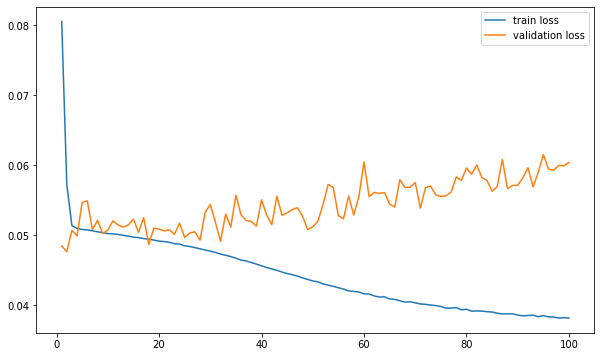

In [57]:
model = BiGRU(27,64)
train_settings = TrainSettings(EPOCHS=100, LR=0.001, MOMENTUM = 0.9)
trainer = NetworkTrainer(model, train_settings)
trainer.train(train_loader=train_loader,  validation_loader=val_loader, test_loader=test_loader)

## Training final models for 11x27

EPOCH 1:: train_loss: 0.08191033237437943, validation_loss: 0.04807656481437089
EPOCH 2:: train_loss: 0.057638628961942155, validation_loss: 0.04323631002239271
EPOCH 3:: train_loss: 0.05143576576949253, validation_loss: 0.046875497174584946
EPOCH 4:: train_loss: 0.0510928781906145, validation_loss: 0.04776110189417908
EPOCH 5:: train_loss: 0.05093742278706957, validation_loss: 0.05040611075067727
EPOCH 6:: train_loss: 0.050832704844875023, validation_loss: 0.05087211138708292
EPOCH 7:: train_loss: 0.05071270092005993, validation_loss: 0.05150008679755016
EPOCH 8:: train_loss: 0.05060531443633646, validation_loss: 0.04917964259897911
EPOCH 9:: train_loss: 0.050550233556026294, validation_loss: 0.052473892744806856
EPOCH 10:: train_loss: 0.05045555308489486, validation_loss: 0.052885237789368794
final test_loss: 0.05895233149109352


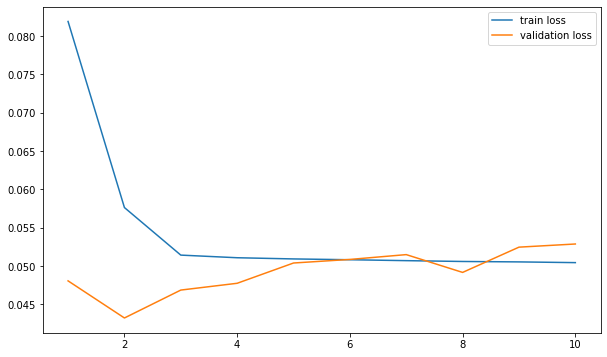

ROC for PRCCRDSDs. AUC = 0.8148


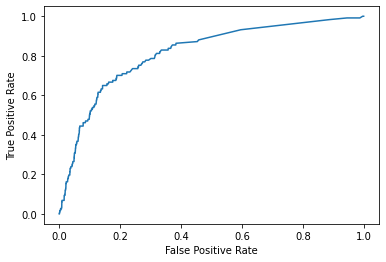

PRC for PRCCRDSDs. AUC = 0.0502


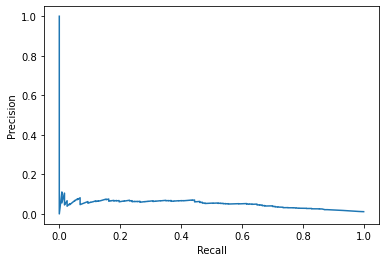

Optimal ROC point: opt_fpr=0.18896713615023475, opt_tpr=0.7008547008547008
cutoffprob: 0.03491375967860222
acc:0.7931534667827096
prec:0.03751143641354071
rec:0.7008547008547008
f1:0.07121146330872774



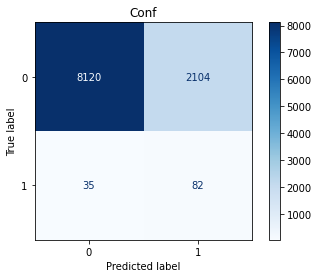

ROC for PRCCRDSDs. AUC = 0.7964


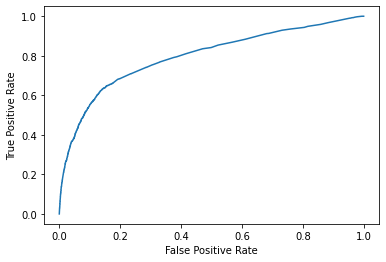

PRC for PRCCRDSDs. AUC = 0.0854


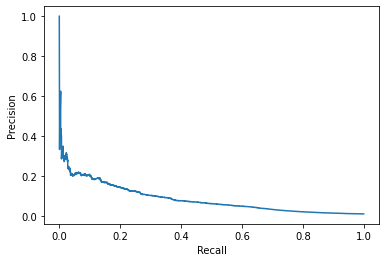

Optimal ROC point: opt_fpr=0.19178910396053855, opt_tpr=0.6812891674127126
cutoffprob: 0.01092682033777237
acc:0.8058678313710597
prec:0.036497050501175
rec:0.6812891674127126
f1:0.06928259286234523



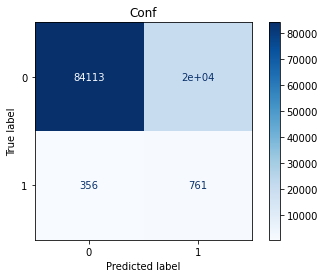

ROC for PRCCRDSDs. AUC = 0.7651


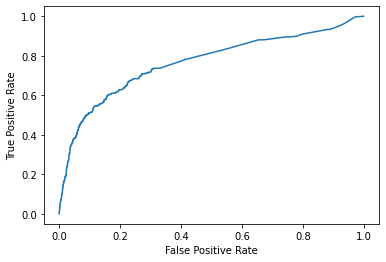

PRC for PRCCRDSDs. AUC = 0.0522


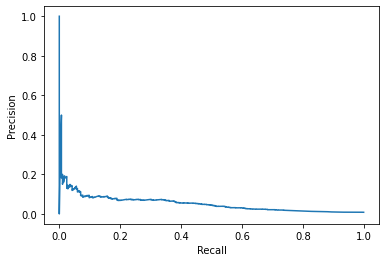

Optimal ROC point: opt_fpr=0.2710332482319453, opt_tpr=0.7087719298245614
cutoffprob: 0.02450214885175228
acc:0.7177405273266981
prec:0.02057445508250153
rec:0.7087719298245614
f1:0.03998812233989904



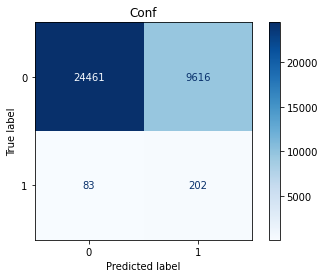

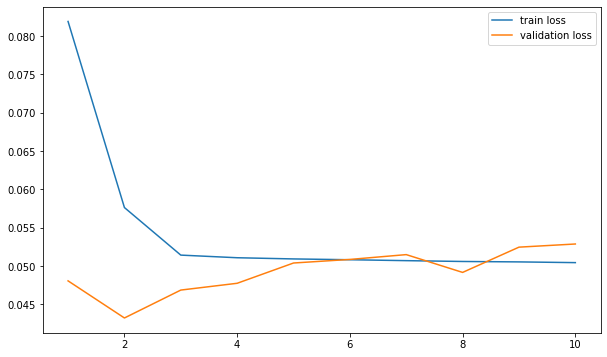

In [37]:
name = "BiGRUc"
model = BiGRU(27,64)
train_settings = TrainSettings(EPOCHS=10, LR=0.001)
trainer = NetworkTrainer(model, train_settings)
trainer.train(train_loader=train_loader,  validation_loader=val_loader, test_loader=test_loader)

eval_network_on_data(trainer.network, test_set=test_set, name=name + "_test")
eval_network_on_data(trainer.network, test_set=train_set, name=name + "_train")
eval_network_on_data(trainer.network, test_set=val_set, name=name + "_val")
trainer.history.plot_losses(f"images/{name}_trainlosses.png")
trainer_BiGRU = trainer

EPOCH 1:: train_loss: 0.08189856223097057, validation_loss: 0.04829984212044979
EPOCH 2:: train_loss: 0.05846493960338041, validation_loss: 0.045234327669671795
EPOCH 3:: train_loss: 0.05238300228708605, validation_loss: 0.046306899606341996
EPOCH 4:: train_loss: 0.05128740456883406, validation_loss: 0.04643942228680016
EPOCH 5:: train_loss: 0.05108976833652486, validation_loss: 0.051058934730351384
EPOCH 6:: train_loss: 0.05099603913751304, validation_loss: 0.052864427230812035
EPOCH 7:: train_loss: 0.05093774206064814, validation_loss: 0.048916677798275535
EPOCH 8:: train_loss: 0.050849861047236676, validation_loss: 0.05368345924054402
EPOCH 9:: train_loss: 0.05081812283466331, validation_loss: 0.049451427096233756
EPOCH 10:: train_loss: 0.05066201942691638, validation_loss: 0.05237717770745154
final test_loss: 0.05939650396745194


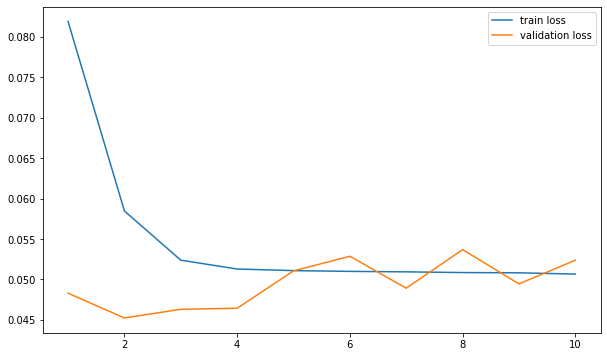

ROC for PRCCRDSDs. AUC = 0.8117


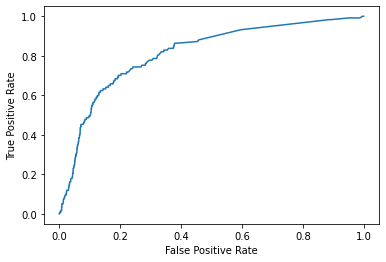

PRC for PRCCRDSDs. AUC = 0.0451


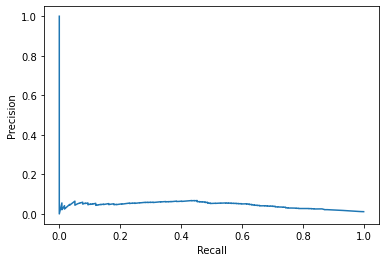

Optimal ROC point: opt_fpr=0.24178403755868544, opt_tpr=0.7435897435897436
cutoffprob: 0.02081824466586113
acc:0.7312639009766947
prec:0.03067700987306065
rec:0.7435897435897436
f1:0.05892312902133424



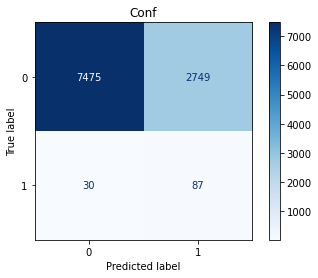

ROC for PRCCRDSDs. AUC = 0.7912


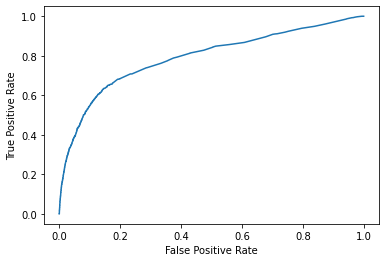

PRC for PRCCRDSDs. AUC = 0.0829


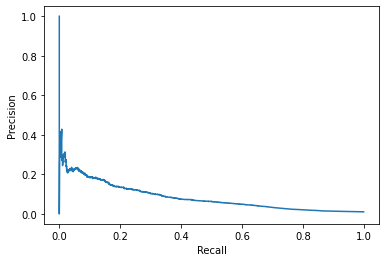

Optimal ROC point: opt_fpr=0.19117491818853583, opt_tpr=0.6812891674127126
cutoffprob: 0.008907522074878216
acc:0.8037884542347132
prec:0.036117702895111535
rec:0.6812891674127126
f1:0.06859872898544193



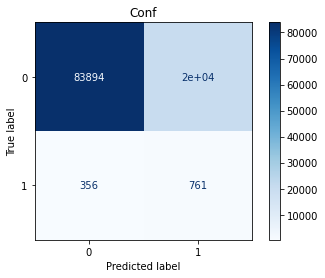

ROC for PRCCRDSDs. AUC = 0.7666


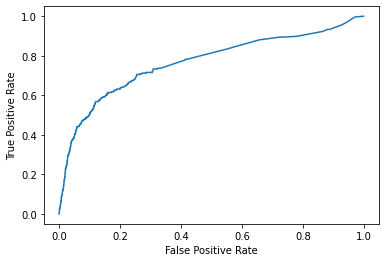

PRC for PRCCRDSDs. AUC = 0.055


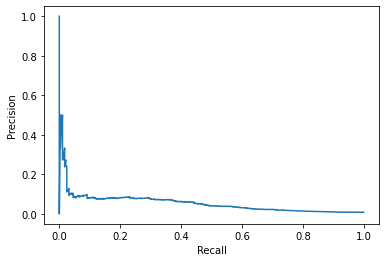

Optimal ROC point: opt_fpr=0.2544824955248408, opt_tpr=0.7052631578947368
cutoffprob: 0.02190699428319931
acc:0.7347651475467085
prec:0.021774455638609035
rec:0.7052631578947368
f1:0.04224464060529634



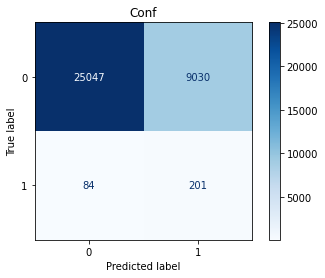

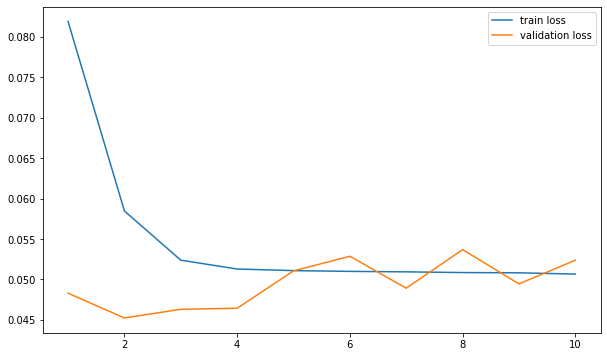

In [38]:
name = "BiLSTMc"
model = BiLSTM(27,64)
train_settings = TrainSettings(EPOCHS=10, LR=0.001)
trainer = NetworkTrainer(model, train_settings)
trainer.train(train_loader=train_loader,  validation_loader=val_loader, test_loader=test_loader)

eval_network_on_data(trainer.network, test_set=test_set, name=name + "_test")
eval_network_on_data(trainer.network, test_set=train_set, name=name + "_train")
eval_network_on_data(trainer.network, test_set=val_set, name=name + "_val")
trainer.history.plot_losses(f"images/{name}_trainlosses.png")
trainer_BiLSTM = trainer

EPOCH 1:: train_loss: 0.11830978946702995, validation_loss: 0.04712599959107593
EPOCH 2:: train_loss: 0.05216739515385223, validation_loss: 0.04759400553578954
EPOCH 3:: train_loss: 0.05169060434955089, validation_loss: 0.049601153061804286
EPOCH 4:: train_loss: 0.05167954212080785, validation_loss: 0.04550550981983564
EPOCH 5:: train_loss: 0.051333339538381345, validation_loss: 0.04816983701490695
EPOCH 6:: train_loss: 0.05145705738025295, validation_loss: 0.048354430585352874
EPOCH 7:: train_loss: 0.051271223167344455, validation_loss: 0.04692822683937134
EPOCH 8:: train_loss: 0.05130913415594763, validation_loss: 0.05024068855988581
EPOCH 9:: train_loss: 0.05116748122538716, validation_loss: 0.05326262903446112
EPOCH 10:: train_loss: 0.05107895927118159, validation_loss: 0.04939250395820347
final test_loss: 0.05761062823248237


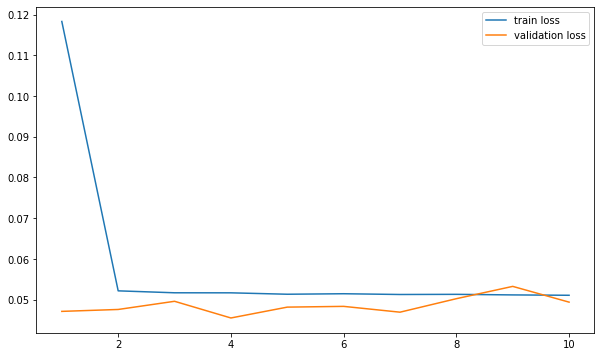

ROC for PRCCRDSDs. AUC = 0.8103


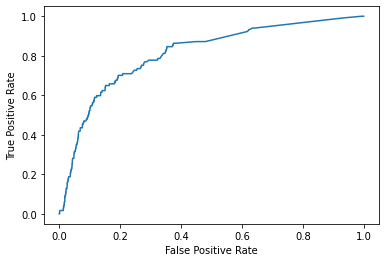

PRC for PRCCRDSDs. AUC = 0.0475


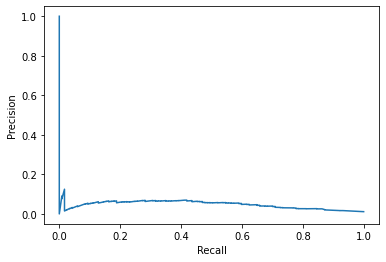

Optimal ROC point: opt_fpr=0.1936619718309859, opt_tpr=0.7008547008547008
cutoffprob: 0.02795187197625637
acc:0.7914128227444154
prec:0.03720508166969147
rec:0.7008547008547008
f1:0.07065919862128392



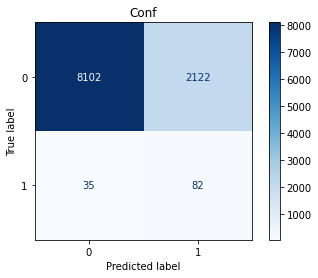

ROC for PRCCRDSDs. AUC = 0.7946


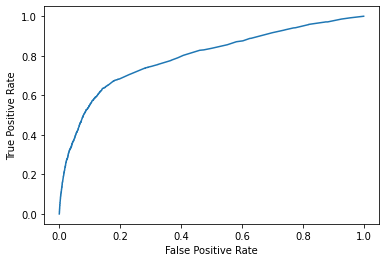

PRC for PRCCRDSDs. AUC = 0.076


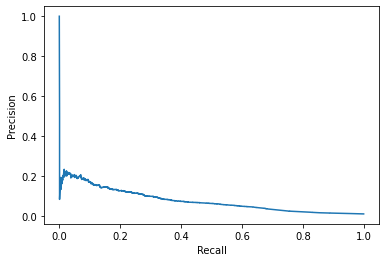

Optimal ROC point: opt_fpr=0.1826722839073731, opt_tpr=0.6768128916741272
cutoffprob: 0.007719078101217747
acc:0.8128845423471326
prec:0.0376081981892349
rec:0.6768128916741272
f1:0.07125689240774778



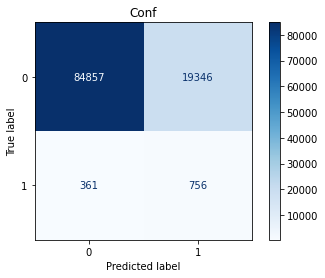

ROC for PRCCRDSDs. AUC = 0.7711


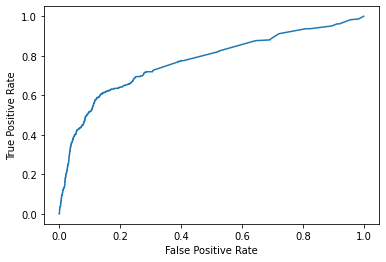

PRC for PRCCRDSDs. AUC = 0.0463


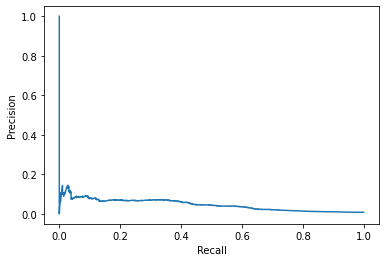

Optimal ROC point: opt_fpr=0.2514599289843589, opt_tpr=0.6947368421052632
cutoffprob: 0.015530542470514774
acc:0.7337465805249985
prec:0.021382289416846653
rec:0.6947368421052632
f1:0.04148768988999477



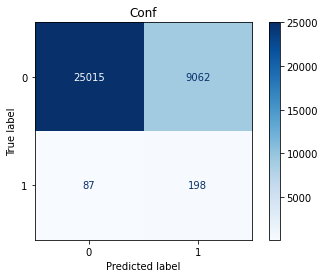

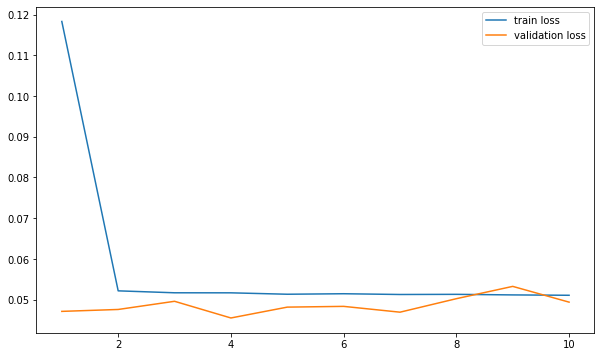

In [39]:
name = "Transformerc"
model = MyTransformer(27,3,64)
train_settings = TrainSettings(EPOCHS=10, LR=0.001)
trainer = NetworkTrainer(model, train_settings)
trainer.train(train_loader=train_loader,  validation_loader=val_loader, test_loader=test_loader)

eval_network_on_data(trainer.network, test_set=test_set, name=name + "_test")
eval_network_on_data(trainer.network, test_set=train_set, name=name + "_train")
eval_network_on_data(trainer.network, test_set=val_set, name=name + "_val")
trainer.history.plot_losses(f"images/{name}_trainlosses.png")
trainer_Transformer = trainer

In [20]:

LOADERS3 = (train_loader_3, val_loader_3, test_loader_3, train_set_3, val_set_3, test_set_3)
LOADERS5 = (train_loader_5, val_loader_5, test_loader_5, train_set_5, val_set_5, test_set_5)

configuration = [
    {"model": BiGRU(27,64),
     "name": "BiGRU_3",
     "trainer": None,
      "loaders": LOADERS3
    },
    {"model": BiGRU(27,64),
     "name": "BiGRU_5",
     "trainer": None,
     "loaders": LOADERS5
    },
    {"model": BiLSTM(27,64),
     "name": "BiLSTM_3",
     "trainer": None,
     "loaders": LOADERS3
    },
    {"model": BiLSTM(27,64),
     "name": "BiLSTM_5",
     "trainer": None,
     "loaders": LOADERS5
    },
    {"model": MyTransformer(27,3,64),
     "name": "Transformer_3",
     "trainer": None,
     "loaders": LOADERS3
    },
    {"model": MyTransformer(27,3,64),
     "name": "Transformer_5",
     "trainer": None,
     "loaders": LOADERS5
    }
]



**************************************************
name: BiGRU_3
EPOCH 1:: train_loss: 0.05132062042084622, validation_loss: 0.05088543038739154
EPOCH 2:: train_loss: 0.05119928711670866, validation_loss: 0.05333022312596974
EPOCH 3:: train_loss: 0.05107805781459745, validation_loss: 0.054147167398542986
EPOCH 4:: train_loss: 0.05092890411233363, validation_loss: 0.054300965291037215
EPOCH 5:: train_loss: 0.05084165323128095, validation_loss: 0.052330852872848437
EPOCH 6:: train_loss: 0.050690700322604657, validation_loss: 0.05324261617024962
EPOCH 7:: train_loss: 0.05061729037451554, validation_loss: 0.05723971283667912
EPOCH 8:: train_loss: 0.050504514309013475, validation_loss: 0.06064258719326162
EPOCH 9:: train_loss: 0.050474325408313696, validation_loss: 0.05435362243462751
EPOCH 10:: train_loss: 0.050366995315906826, validation_loss: 0.056947946892565035
final test_loss: 0.06037907265004222


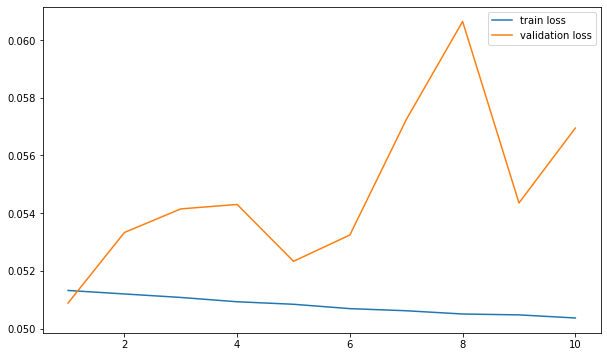

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9886858137510879
prec:  nan
rec:  0.0
f1:  nan



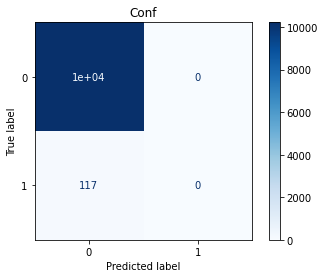

ROC for PRCCRDSDs. AUC = 0.8058


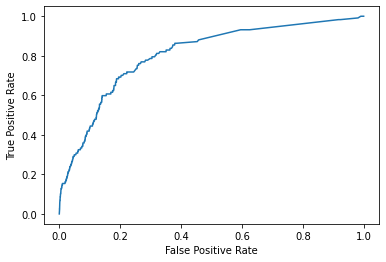

PRC for PRCCRDSDs. AUC = 0.0761


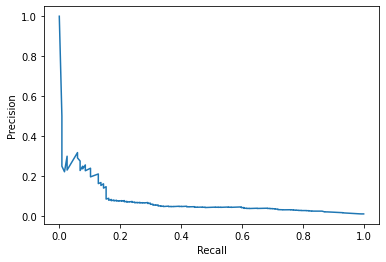

[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9893942271173566
prec:  nan
rec:  0.0
f1:  nan



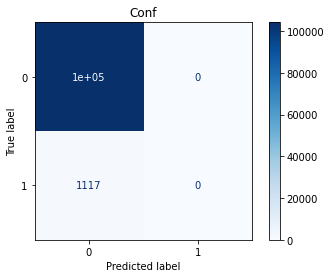

ROC for PRCCRDSDs. AUC = 0.8013


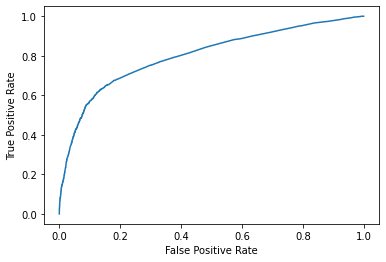

PRC for PRCCRDSDs. AUC = 0.0918


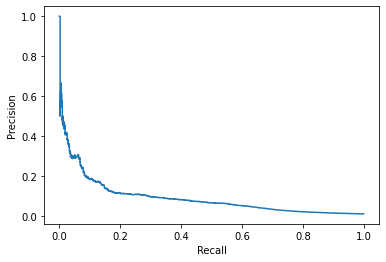

[0. 0. 0. ... 0. 0. 0.]
acc:0.9917059542517898
prec:  nan
rec:  0.0
f1:  nan



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


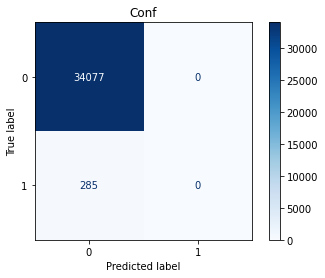

ROC for PRCCRDSDs. AUC = 0.7589


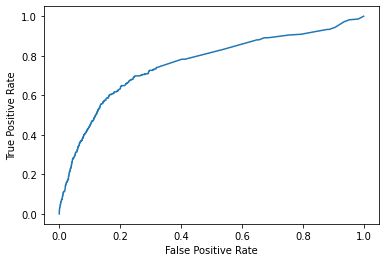

PRC for PRCCRDSDs. AUC = 0.0477


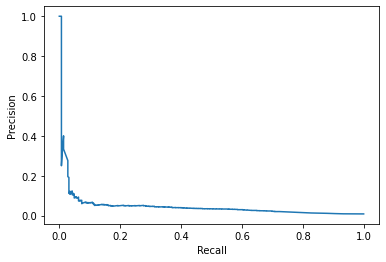

[0. 0. 0. ... 0. 0. 0.]


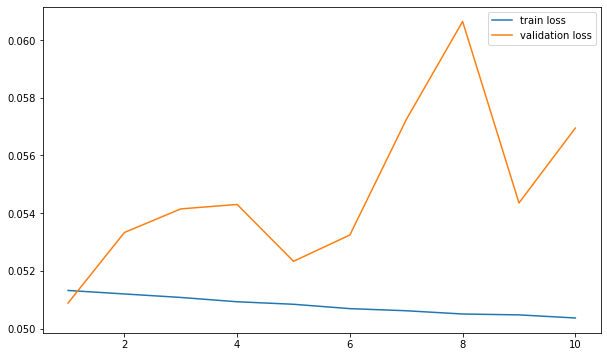

**************************************************
name: BiGRU_5
EPOCH 1:: train_loss: 0.05406973656143836, validation_loss: 0.05187165309831099
EPOCH 2:: train_loss: 0.05158810951593843, validation_loss: 0.049397664800967994
EPOCH 3:: train_loss: 0.05127769271134651, validation_loss: 0.05211906637988846
EPOCH 4:: train_loss: 0.05109632730234996, validation_loss: 0.05517985710429598
EPOCH 5:: train_loss: 0.05095763052546656, validation_loss: 0.048575976207604316
EPOCH 6:: train_loss: 0.05080178892052461, validation_loss: 0.05582776785787572
EPOCH 7:: train_loss: 0.05070933176312798, validation_loss: 0.05476131104550812
EPOCH 8:: train_loss: 0.05059168791158589, validation_loss: 0.052400529905212656
EPOCH 9:: train_loss: 0.0504985003673075, validation_loss: 0.057979509366475536
EPOCH 10:: train_loss: 0.050414990807186276, validation_loss: 0.056395183099724
final test_loss: 0.0628367602236525


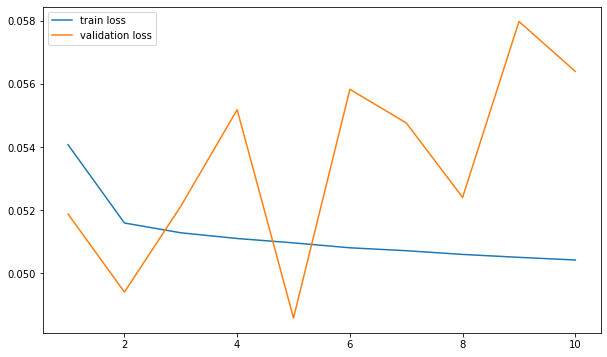

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9886858137510879
prec:  nan
rec:  0.0
f1:  nan



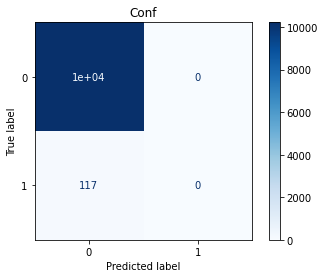

ROC for PRCCRDSDs. AUC = 0.8111


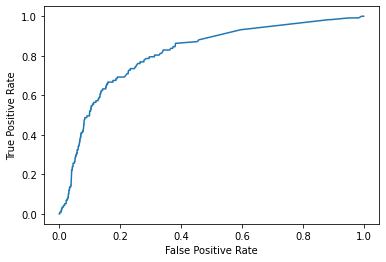

PRC for PRCCRDSDs. AUC = 0.0429


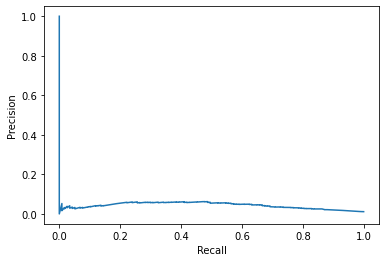

[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9893942271173566
prec:  nan
rec:  0.0
f1:  nan



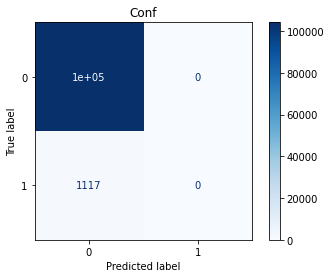

ROC for PRCCRDSDs. AUC = 0.7956


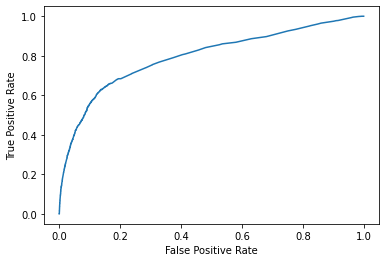

PRC for PRCCRDSDs. AUC = 0.0886


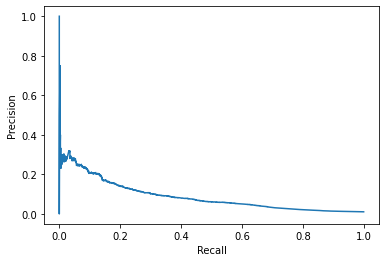

[0. 0. 0. ... 0. 0. 0.]
acc:0.9917059542517898
prec:  nan
rec:  0.0
f1:  nan



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


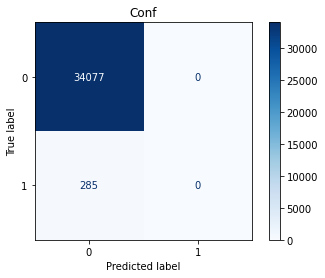

ROC for PRCCRDSDs. AUC = 0.7631


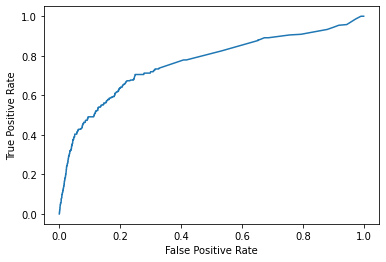

PRC for PRCCRDSDs. AUC = 0.0461


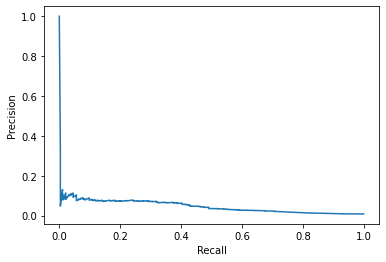

[0. 0. 0. ... 0. 0. 0.]


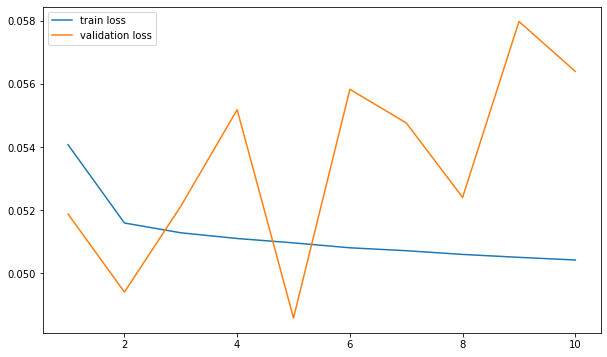

**************************************************
name: BiLSTM_3
EPOCH 1:: train_loss: 0.08746497814359261, validation_loss: 0.04910045305561751
EPOCH 2:: train_loss: 0.05253306941171359, validation_loss: 0.047722459740546036
EPOCH 3:: train_loss: 0.0517321237169441, validation_loss: 0.05190811493760281
EPOCH 4:: train_loss: 0.05159907622727612, validation_loss: 0.05023751653352291
EPOCH 5:: train_loss: 0.0514091904404224, validation_loss: 0.05452533847454034
EPOCH 6:: train_loss: 0.05128015727766829, validation_loss: 0.057817459994348445
EPOCH 7:: train_loss: 0.05125402944173807, validation_loss: 0.04958567604284668
EPOCH 8:: train_loss: 0.05115628857045313, validation_loss: 0.0585345901240102
EPOCH 9:: train_loss: 0.051168238248519016, validation_loss: 0.05804576613969516
EPOCH 10:: train_loss: 0.05094973474508947, validation_loss: 0.05682734973246435
final test_loss: 0.059940127510865276


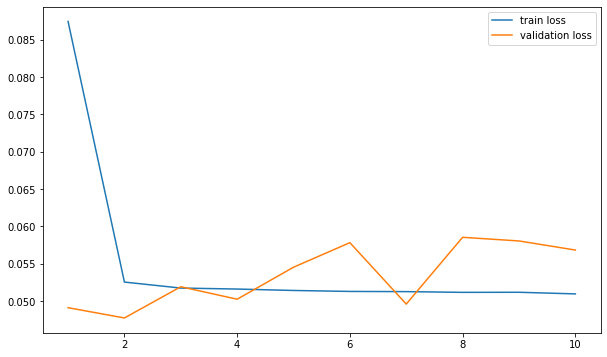

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9886858137510879
prec:  nan
rec:  0.0
f1:  nan



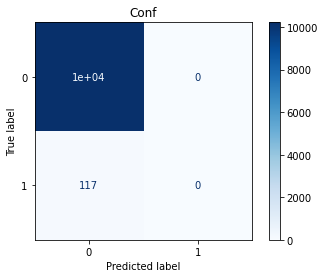

ROC for PRCCRDSDs. AUC = 0.8047


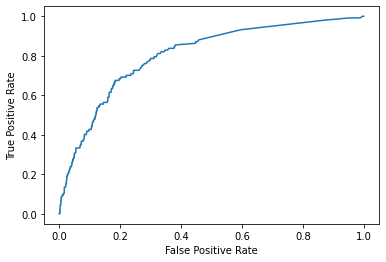

PRC for PRCCRDSDs. AUC = 0.052


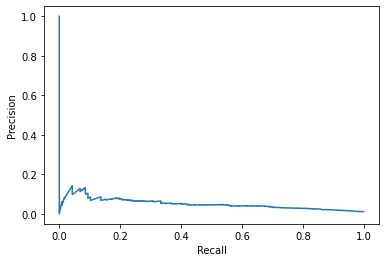

[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9893942271173566
prec:  nan
rec:  0.0
f1:  nan



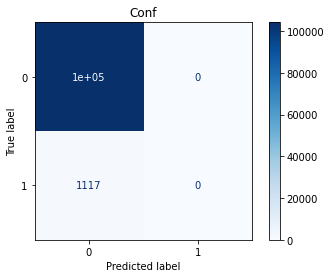

ROC for PRCCRDSDs. AUC = 0.7901


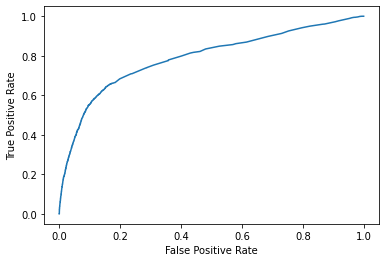

PRC for PRCCRDSDs. AUC = 0.0784


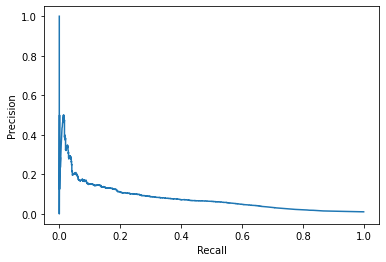

[0. 0. 0. ... 0. 0. 0.]
acc:0.9917059542517898
prec:  nan
rec:  0.0
f1:  nan



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


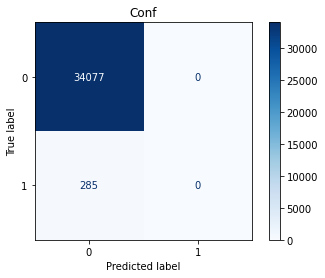

ROC for PRCCRDSDs. AUC = 0.7566


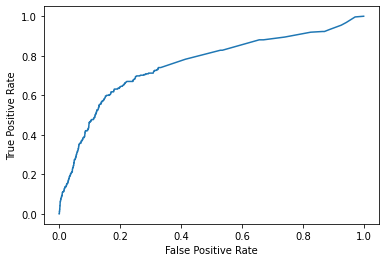

PRC for PRCCRDSDs. AUC = 0.0406


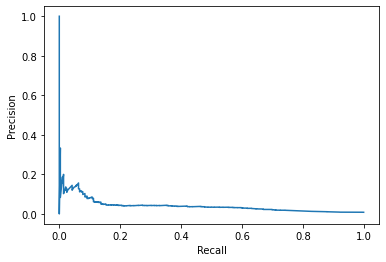

[0. 0. 0. ... 0. 0. 0.]


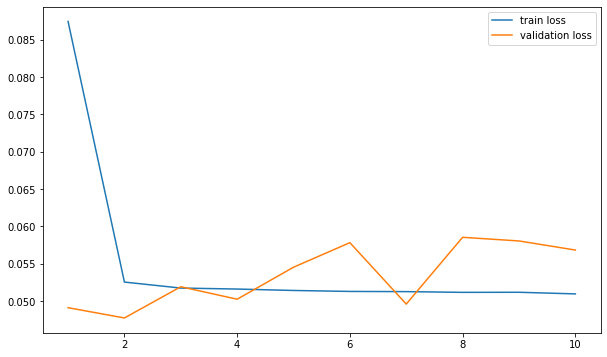

**************************************************
name: BiLSTM_5
EPOCH 1:: train_loss: 0.08293952357421526, validation_loss: 0.04850455851540578
EPOCH 2:: train_loss: 0.05693693643812892, validation_loss: 0.04460701243058051
EPOCH 3:: train_loss: 0.052049511238689256, validation_loss: 0.051166072253225205
EPOCH 4:: train_loss: 0.051501702444264975, validation_loss: 0.05354211150088172
EPOCH 5:: train_loss: 0.05137299434329637, validation_loss: 0.051918527396862736
EPOCH 6:: train_loss: 0.05124563221404795, validation_loss: 0.05242977856221115
EPOCH 7:: train_loss: 0.05095528355628773, validation_loss: 0.049605204663985575
EPOCH 8:: train_loss: 0.050918211710405496, validation_loss: 0.06137228374314748
EPOCH 9:: train_loss: 0.05083612616789735, validation_loss: 0.055280345491685506
EPOCH 10:: train_loss: 0.05072669686924311, validation_loss: 0.052501296229375605
final test_loss: 0.05994237359505467


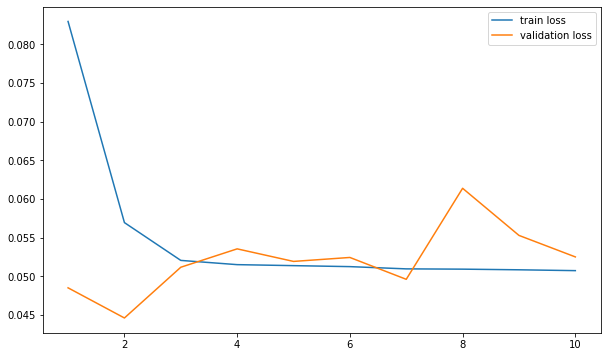

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9886858137510879
prec:  nan
rec:  0.0
f1:  nan



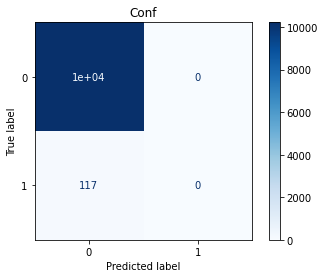

ROC for PRCCRDSDs. AUC = 0.8098


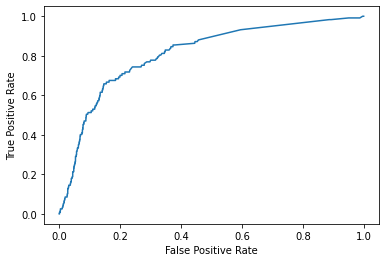

PRC for PRCCRDSDs. AUC = 0.0444


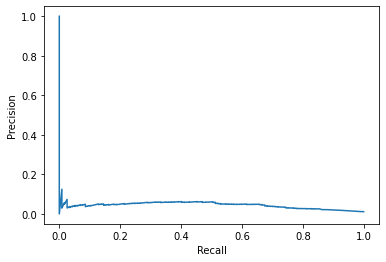

[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9893942271173566
prec:  nan
rec:  0.0
f1:  nan



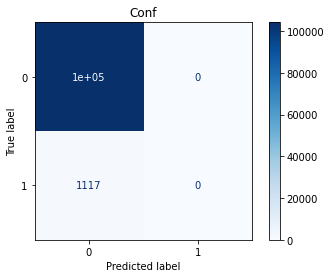

ROC for PRCCRDSDs. AUC = 0.7927


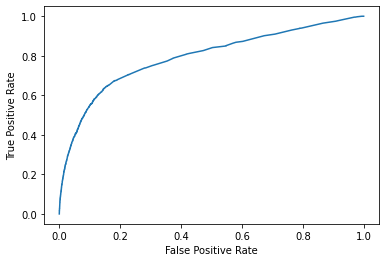

PRC for PRCCRDSDs. AUC = 0.0853


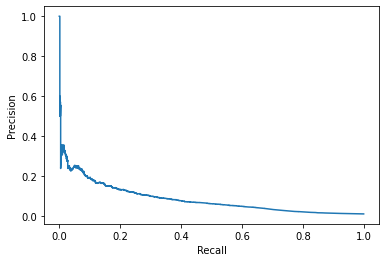

[0. 0. 0. ... 0. 0. 0.]
acc:0.9917059542517898
prec:  nan
rec:  0.0
f1:  nan



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


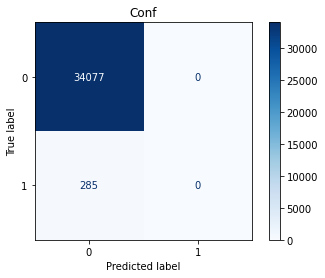

ROC for PRCCRDSDs. AUC = 0.7682


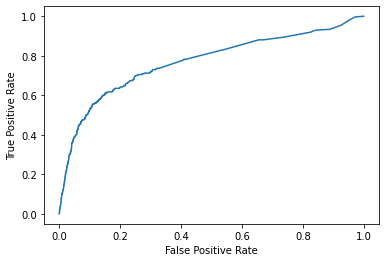

PRC for PRCCRDSDs. AUC = 0.047


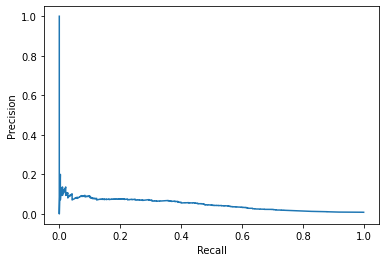

[0. 0. 0. ... 0. 0. 0.]


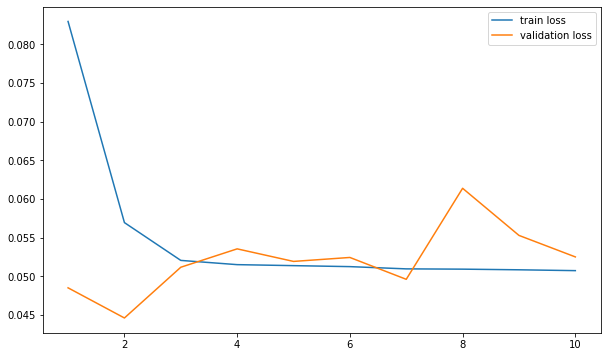

**************************************************
name: Transformer_3
EPOCH 1:: train_loss: 0.12099554443649135, validation_loss: 0.048286973396907566
EPOCH 2:: train_loss: 0.05353367602168959, validation_loss: 0.045714401763751494
EPOCH 3:: train_loss: 0.052121524028465906, validation_loss: 0.05254005524038481
EPOCH 4:: train_loss: 0.05193437026361583, validation_loss: 0.049611535928304314
EPOCH 5:: train_loss: 0.05183944197727436, validation_loss: 0.04824392446628737
EPOCH 6:: train_loss: 0.05172191024862267, validation_loss: 0.04935237278320634
EPOCH 7:: train_loss: 0.051694210968413624, validation_loss: 0.04921312495310671
EPOCH 8:: train_loss: 0.051686244922666394, validation_loss: 0.04893439624164318
EPOCH 9:: train_loss: 0.05150081026058346, validation_loss: 0.05096805738280305
EPOCH 10:: train_loss: 0.05152884785112798, validation_loss: 0.047599761770078394
final test_loss: 0.05659134996884359


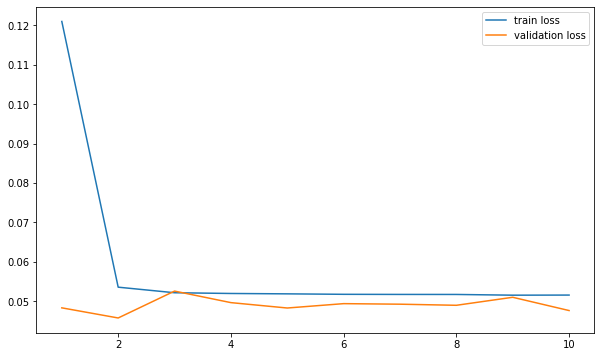

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9886858137510879
prec:  nan
rec:  0.0
f1:  nan



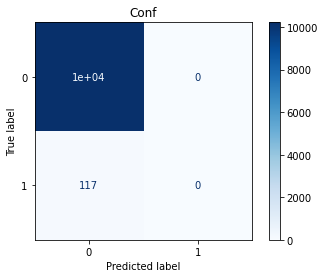

ROC for PRCCRDSDs. AUC = 0.8081


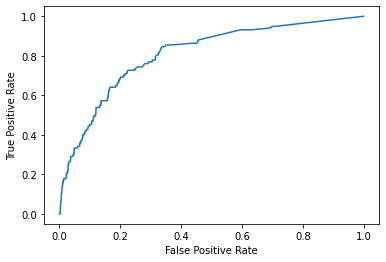

PRC for PRCCRDSDs. AUC = 0.0599


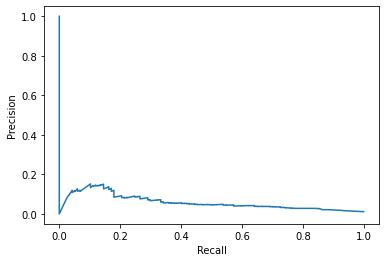

[0. 0. 0. ... 0. 0. 0.]
acc:0.9893942271173566
prec:  nan
rec:  0.0
f1:  nan



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


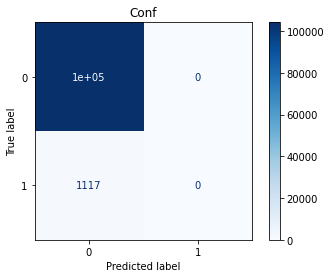

ROC for PRCCRDSDs. AUC = 0.7943


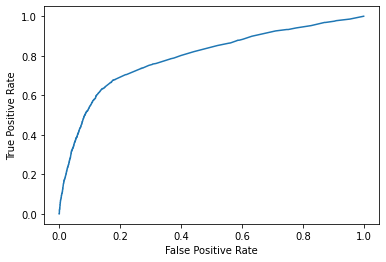

PRC for PRCCRDSDs. AUC = 0.0666


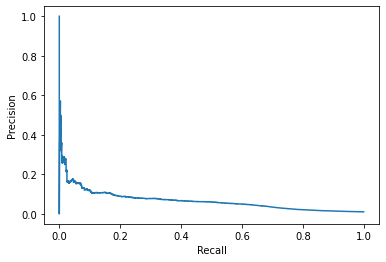

[0. 0. 0. ... 0. 0. 0.]
acc:0.9917059542517898
prec:  nan
rec:  0.0
f1:  nan



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


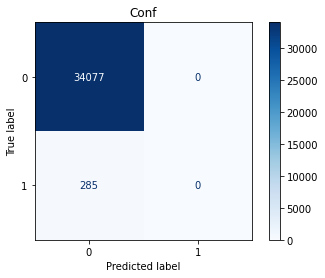

ROC for PRCCRDSDs. AUC = 0.7593


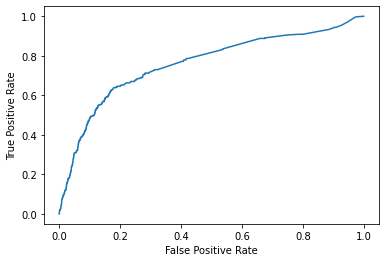

PRC for PRCCRDSDs. AUC = 0.0358


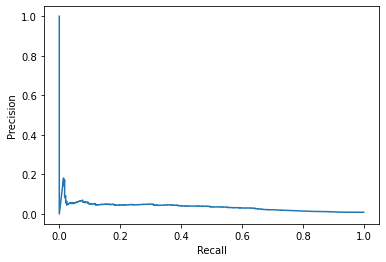

[0. 0. 0. ... 0. 0. 0.]


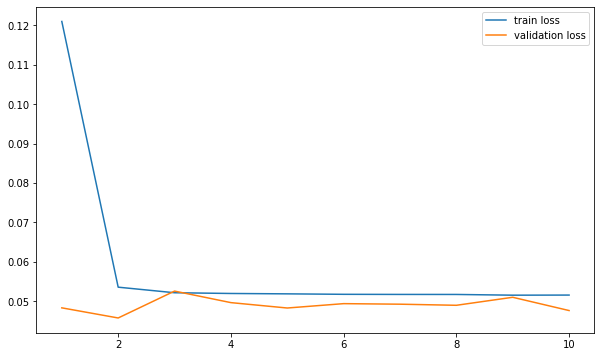

**************************************************
name: Transformer_5
EPOCH 1:: train_loss: 0.11975248409162795, validation_loss: 0.048384202638699865
EPOCH 2:: train_loss: 0.05286293712080634, validation_loss: 0.048337756273466315
EPOCH 3:: train_loss: 0.05186559042528673, validation_loss: 0.04616353267802813
EPOCH 4:: train_loss: 0.051818932028628105, validation_loss: 0.051021718740286326
EPOCH 5:: train_loss: 0.051639414469520833, validation_loss: 0.05011627856581513
EPOCH 6:: train_loss: 0.05148539907870934, validation_loss: 0.05038427048294004
EPOCH 7:: train_loss: 0.051626266338966824, validation_loss: 0.0496358143231948
EPOCH 8:: train_loss: 0.0515271394347303, validation_loss: 0.049774820226468015
EPOCH 9:: train_loss: 0.051429484534175327, validation_loss: 0.05066329703722807
EPOCH 10:: train_loss: 0.051390449462498815, validation_loss: 0.04989753041031974
final test_loss: 0.05756446391563099


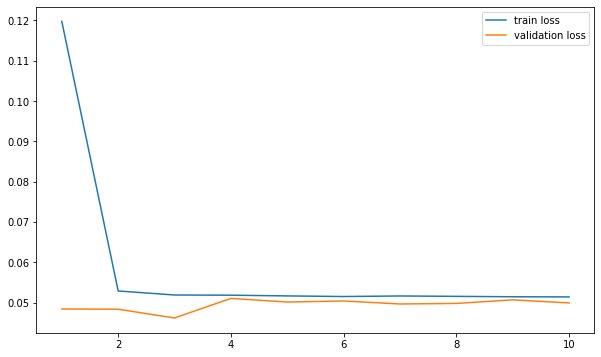

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9886858137510879
prec:  nan
rec:  0.0
f1:  nan



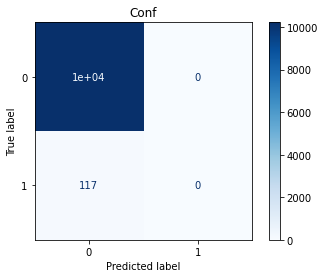

ROC for PRCCRDSDs. AUC = 0.8121


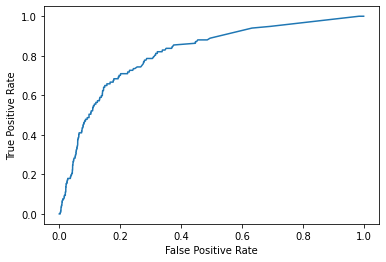

PRC for PRCCRDSDs. AUC = 0.0475


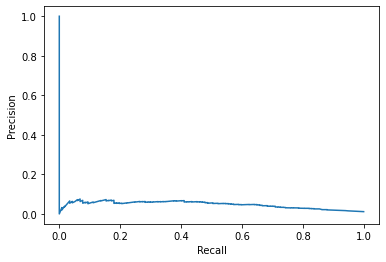

[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9893942271173566
prec:  nan
rec:  0.0
f1:  nan



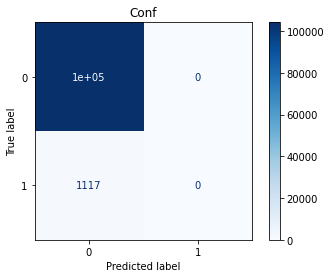

ROC for PRCCRDSDs. AUC = 0.7943


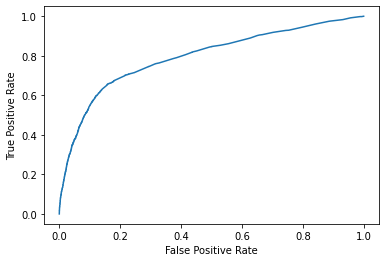

PRC for PRCCRDSDs. AUC = 0.0747


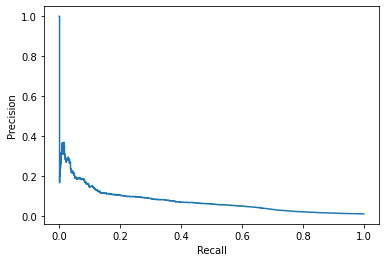

[0. 0. 0. ... 0. 0. 0.]
acc:0.9917059542517898
prec:  nan
rec:  0.0
f1:  nan



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


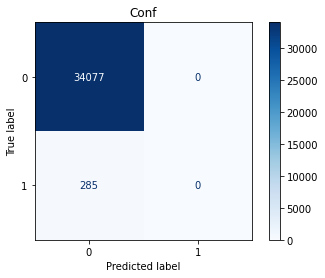

ROC for PRCCRDSDs. AUC = 0.7637


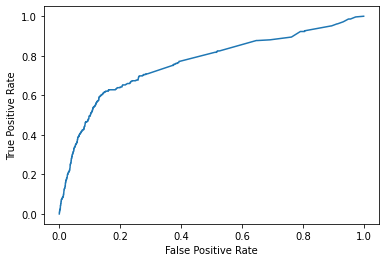

PRC for PRCCRDSDs. AUC = 0.0423


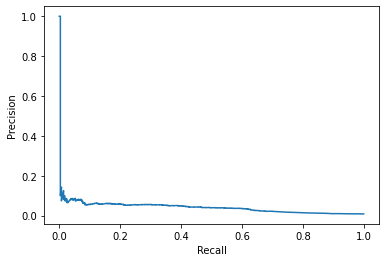

[0. 0. 0. ... 0. 0. 0.]


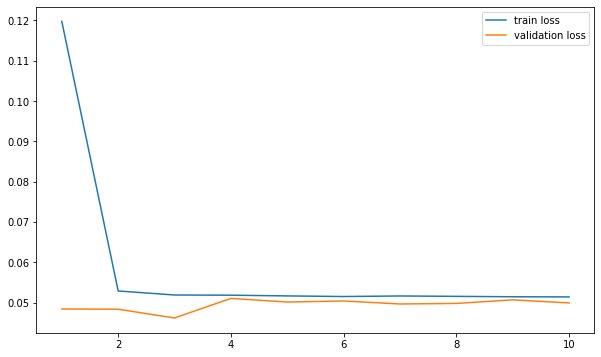

In [24]:
for e in configuration:
    print("*"*50)
    model, name, loaders = e["model"], e["name"], e["loaders"]
    print(f"name: {name}")
    train_loader_i, val_loader_i, test_loader_i, train_set_i, val_set_i, test_set_i =loaders
    train_settings = TrainSettings(EPOCHS=10, LR=0.001)
    trainer = NetworkTrainer(model, train_settings)
    trainer.train(train_loader=train_loader_i,  validation_loader=val_loader_i, test_loader=test_loader_i)
    eval_network_on_data(trainer.network, test_set=test_set_i, name=name + "_test")
    eval_network_on_data(trainer.network, test_set=train_set_i, name=name + "_train")
    eval_network_on_data(trainer.network, test_set=val_set_i, name=name + "_val")
    trainer.history.plot_losses(f"images/{name}_trainlosses.png")
    e["trainer"] = trainer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in long_scalars


acc:0.9886858137510879
prec:  nan
rec:  0.0
f1:  nan



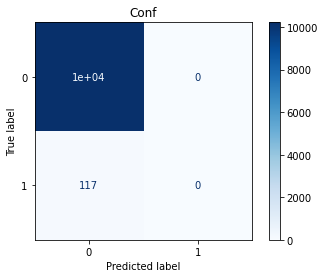

ROC for PRCCRDSDs. AUC = 0.8058


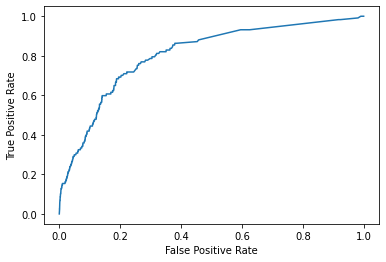

PRC for PRCCRDSDs. AUC = 0.0761


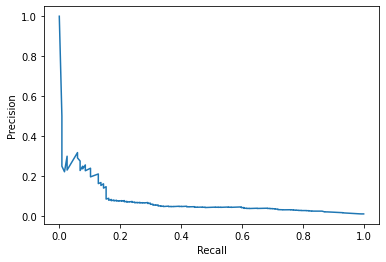

Optimal PRC point: opt_prec=0.2222222222222222, opt_rec=0.017094017094017096
[0. 0. 0. ... 0. 0. 0.]


In [34]:
trainer = configuration[0]["trainer"]
name ="AAAAAAAAAAAAA_recall_test"
eval_network_on_data(trainer.network, test_set=test_set_3, name=name + "_test_prec")

In [27]:
!zip -r /content/i2.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/BiGRU_3_test_prc.png (deflated 16%)
  adding: content/images/Transformer_3_test_prc.png (deflated 19%)
  adding: content/images/Transformer_3_test_conf.png (deflated 19%)
  adding: content/images/BiLSTM_5_test_roc.png (deflated 13%)
  adding: content/images/Transformer_3_train_conf.png (deflated 19%)
  adding: content/images/BiLSTM_3_train_prc.png (deflated 17%)
  adding: content/images/Transformer_5_trainlosses.png (deflated 16%)
  adding: content/images/BiGRU_3_train_prc.png (deflated 17%)
  adding: content/images/Transformer_5_test_prc.png (deflated 20%)
  adding: content/images/Transformer_5_test_roc.png (deflated 12%)
  adding: content/images/BiGRU_5_test_roc.png (deflated 13%)
  adding: content/images/BiGRU_5_test_prc.png (deflated 21%)
  adding: content/images/BiLSTM_3_test_prc.png (deflated 19%)
  adding: content/images/BiGRU_5_trainlosses.png (deflated 7%)
  adding: content/images/Transformer_3_val_roc.png (deflate

EPOCH 1:: train_loss: 0.09705648806598356, validation_loss: 0.04863841908749551
EPOCH 2:: train_loss: 0.05578775007378181, validation_loss: 0.047878448727327806
EPOCH 3:: train_loss: 0.051462996060908, validation_loss: 0.047882090425069475
EPOCH 4:: train_loss: 0.05103006812638083, validation_loss: 0.050916806837688795
EPOCH 5:: train_loss: 0.0509623429203527, validation_loss: 0.05073820211112111
EPOCH 6:: train_loss: 0.05080857647641605, validation_loss: 0.04847108303878722
EPOCH 7:: train_loss: 0.05076434379673439, validation_loss: 0.04805487837807436
EPOCH 8:: train_loss: 0.05075466612299449, validation_loss: 0.050599526717593636
EPOCH 9:: train_loss: 0.05060172507428326, validation_loss: 0.05272096659630185
EPOCH 10:: train_loss: 0.05051956418300372, validation_loss: 0.049791602279057906
final test_loss: 0.05669215809564309


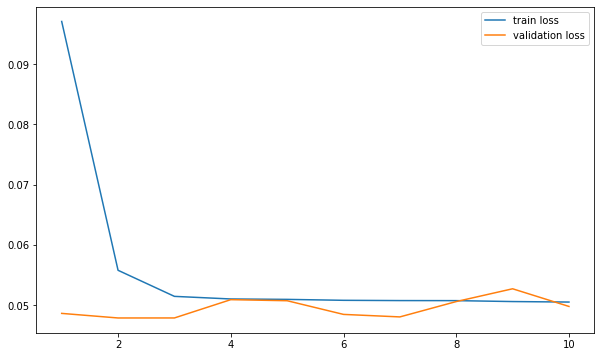

In [16]:
name = "BiGRU"
model = BiGRU(27,32)
train_settings = TrainSettings(EPOCHS=10, LR=0.001)
trainer = NetworkTrainer(model, train_settings)
trainer.train(train_loader=train_loader,  validation_loader=val_loader, test_loader=test_loader)

ROC for PRCCRDSDs. AUC = 0.8128


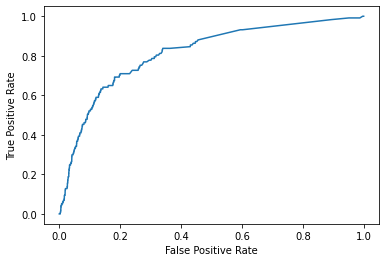

PRC for PRCCRDSDs. AUC = 0.0493


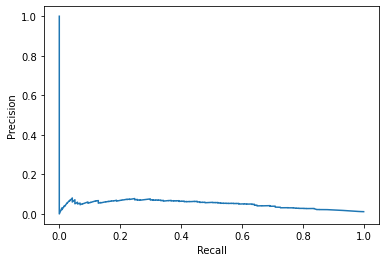

Optimal ROC point: opt_fpr=0.19953051643192488, opt_tpr=0.7094017094017094
cutoffprob: 0.02300850860774517
acc:0.7683009380137318
prec:0.033946830265848674
rec:0.7094017094017094
f1:0.06479313036690086



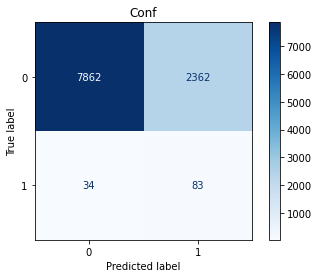

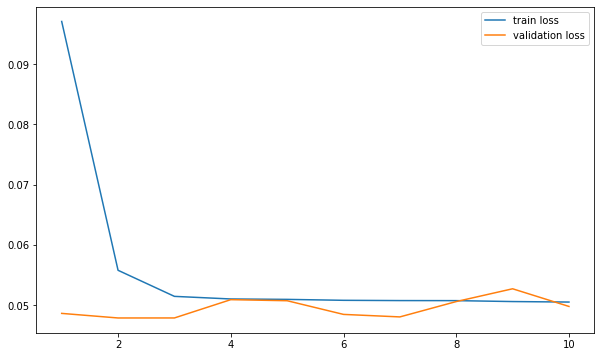

In [36]:
eval_network_on_data(trainer.network, test_set=test_set, name=name + "_test")
trainer.history.plot_losses(f"images/{name}_trainlosses.png")